In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_path = "/content/drive/MyDrive/archive.zip"
extract_to = "/content/Tree_Species_Dataset"


In [4]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ ZIP extracted!")


✅ ZIP extracted!


In [6]:
import os

folder_path = os.path.join(extract_to, "Tree_Species_Dataset")
print("Species folders:", os.listdir(folder_path))

Species folders: ['garmalo', 'pipal', 'shirish', 'champa', 'khajur', 'amla', 'babul', 'bamboo', 'jamun', 'bili', 'sitafal', 'motichanoti', 'kesudo', 'vad', 'gunda', 'neem', 'sugarcane', 'cactus', 'mango', 'sonmahor', 'nilgiri', 'kanchan', 'asopalav', 'banyan', 'gulmohor', 'pilikaren', 'coconut', 'saptaparni', 'other', '.git', 'simlo']


In [7]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    folder_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    folder_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,396,319 (28.21 MB)

 Trainable params: 7,396,319 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 957ms/step - accuracy: 0.0568 - loss: 3.8870 - val_accuracy: 0.0938 - val_loss: 3.2965
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 893ms/step - accuracy: 0.1057 - loss: 3.2918 - val_accuracy: 0.1469 - val_loss: 3.2376
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 955ms/step - accuracy: 0.1261 - loss: 3.1598 - val_accuracy: 0.1719 - val_loss: 2.9490
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 900ms/step - accuracy: 0.1955 - loss: 2.8955 - val_accuracy: 0.2719 - val_loss: 2.8016
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 958ms/step - accuracy: 0.3338 - loss: 2.5167 - val_accuracy: 0.3313 - val_loss: 2.5636
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 942ms/step - accuracy: 0.4408 - loss: 2.1280 - val_accuracy: 0.3656 - val_loss: 2.4193
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 919ms/step - accuracy: 0.5536 - loss: 1.5954 - val_accuracy: 0.3781 - val_loss: 2.3278
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 970ms/step - accuracy: 0.6348 - loss: 1.2644 - val_accu

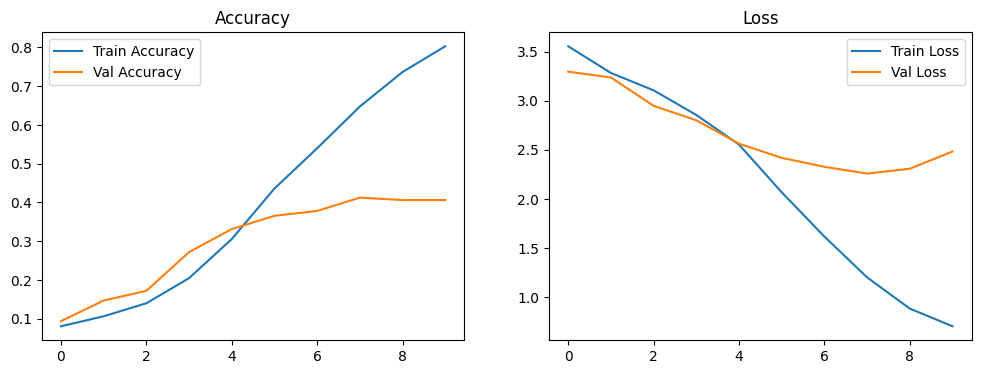

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()
